

#### Análisis y Procesamiento de Señales

# Tarea Semanal N°1 
#### Eugenio Briamonte


# Introducción
    En esta tarea se buscó crear y modificar señales sinusoidales. Con el objetivo es comprender como funcionan algunas opreaciones básicas de manipulacion de señales digitales, se sintetizó una onda sinusoidal "Base" sobre la que se aplicaron diferentes funciones de la librería Numpy y Scipy, utilizando la librería Matplot para realizar los gráficos correspondientes a cada tarea. Las operaciones realizadas en esta tarea incluyen la autocorrelación y correlación cruzada, modulación, recorte y producto interno. Dichas operaciones estan integradas en las librerías mencionadas, pero pueden calcularse de forma analítica acorde a las siguientes expresiones:
Correlación cruzada entre dos secuencias X e Y dependientes de un indice discreto 'n' y con una demora 'l' entre ellas: 
$$ r_{xy}[n,l]=\displaystyle \lim_{ N\to \infty }\frac{1}{N}\sum_{n=0}^{N-1}x(n).y(n-l) $$
Producto interno entre dos vectores A y B:
$$\overrightarrow{A}.\overrightarrow{B} = \left | A\right |.\left | B\right |.cos(\measuredangle AB)$$
Modulacion de una señal sinusoidal de frecuencia W por una señal moduladora de frecuencia W', ambas con amplitud unitaria:
$$sin_{mod}(W.n)=sin(W'.n).sin(W.n)$$
    


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

# Analisis y desarrollo

## Consigna 1
    Aquí se realizó la sintesis del seno "Base", definido con una función def() y usando funciones de la libreria Numpy (principalmente np.sin). Se trata de una función senoidal con frecuencia de 2kHz y amplitud unitaria. Las variables universales (frecuencia de "sampleo" y cantidad de muestras) se dejaron fijas para todas las consignas por cuestiones de prolijidad. Hablar de Nyqwist
    Las operaciones realizadas sobre el seno Base son las siguientes:
        - Duplicacion de frecuencia y desfase en \pi/2
        - Modulacion con una onda senoidal con la mitad de frecuencia (1000 Hz)
        - Recorte al 75% de su potencia 
    Posteriormente se sintetizó una onda cuadrada, de amplitud unitaria y frecuencia 4kHz. Esta onda fue creada a partir de una senoidal a la que se le aplicó la funcion np.Sign, que toma el signo de una funcion y lo muestra, tomando instantaneamente el valor de amplitud +1 en las regiones positivas de la función y -1 en las negativas.
    La ultima señal implementada es un pulso de 10 ms (0,010 segundos) de duración. Exceptuando este último, todos los muestreos fueron realizados con una frecuencia Fs de 2 000 000/unidad de tiempo, tomando 5000 muestras a lo largo de 0,0025 unidades de tiempo. Para el pulso el tiempo se extiende hasta 1 segundo.


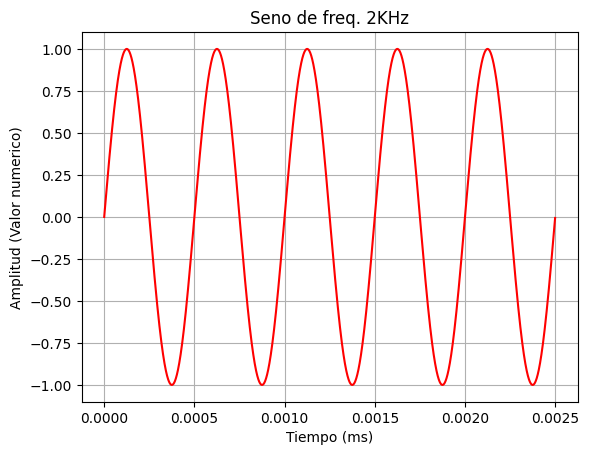

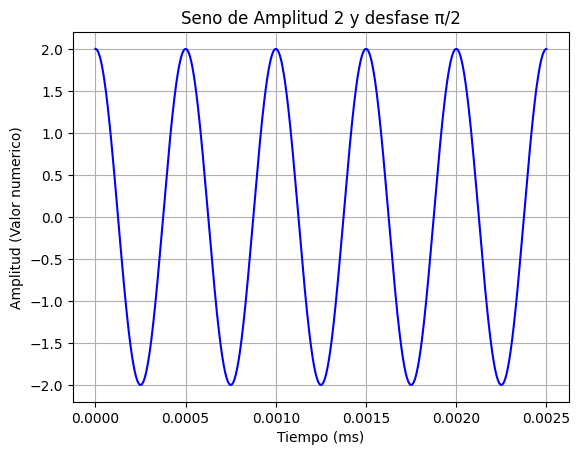

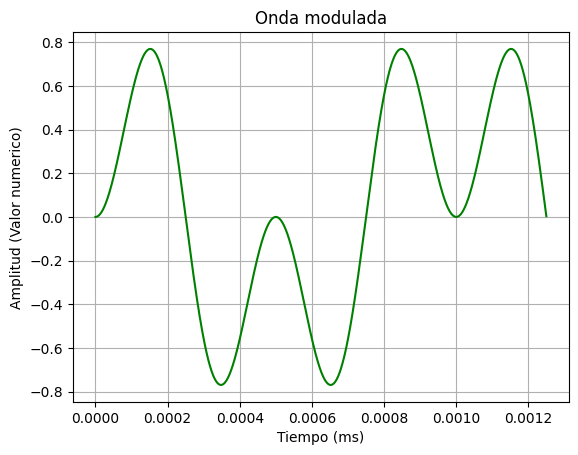

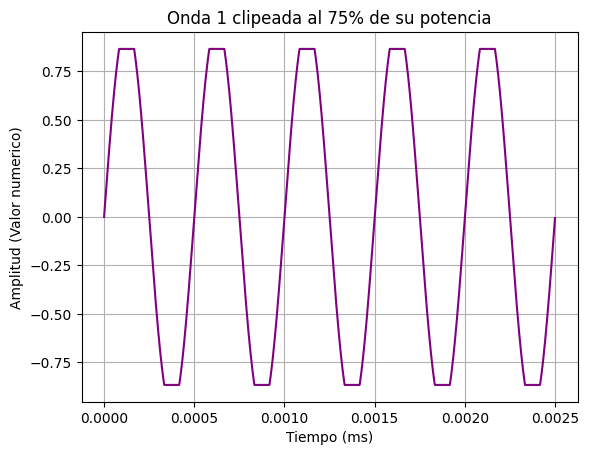

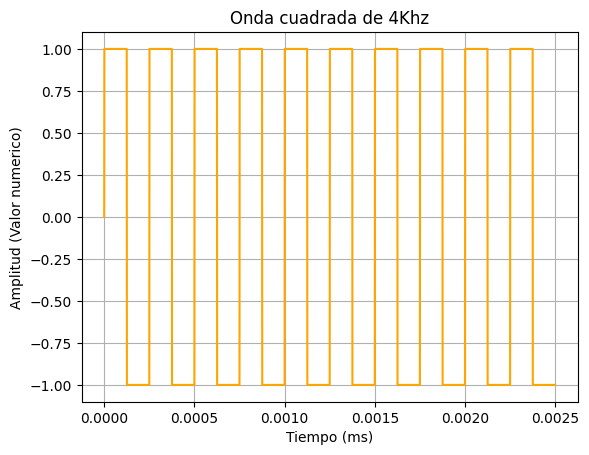

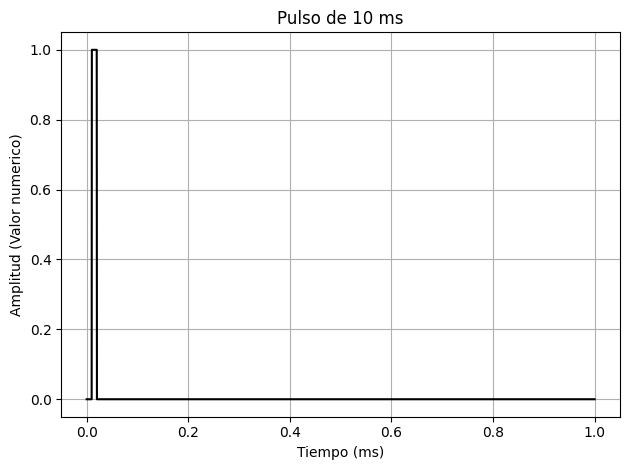

In [3]:

fs = 1000 #Frecuencia de muestreo
N = fs #Espacios de muestreo


def sen(amp, dc, ff, ph, nn, fs): #Definicion del seno base, parametros(Amplitud, desplazamiento, frecuencia, fase, numero de muestras, frecuencia de muestreo)
    N=np.arange(nn) #Recorre los espacios de muestreo hasta alcanzar nn(Numero de muestras)
    t=N/fs #Declaracion de variable t, eje X
    x= dc + amp*np.sin(2*np.pi*ff*t+ph) #Declaracion e variable x, eje y (Valor del seno en t)
   
    return t,x


#Ondas 1 y 2

t1,x1=sen(1,0,2000,0,5000,2000000)# Onda consigna 1
t2,x2=sen(2,0,2000,np.pi/2,5000,2000000) # Onda consigna 2


#Funciones de recorte, aportadas por GeminiAI

aMax = np.sqrt(0.75) #Valor techo para la amplitud
aMin = -aMax #Valor piso, definido como '-Valor techo' para garantizar simetria
ondaRcrt =np.clip(x2, aMin, aMax) #Funcion de recorte en si, toma parametros ()


#Ondas 3, 4 y 5

t3m, ondaMdldr = sen(1,0,1000,0,5000,4000000) #Onda modulada
t3,x3=sen(ondaMdldr,0,2000,0,5000,4000000) # Onda consigna 3 
t4,x4=np.clip(sen(1,0,2000,0 ,5000,2000000), aMin, aMax) #Onda consigna 4
t5,x5=sen(1,0,4000,0,5000,2000000) #Onda consigna 5 (Sin cuadrar)
ondaCdr = np.sign(x5) #Funcion que hace cuadrada la onda anterior


t6 = np.linspace(0,1,5000) #Eje x del pulso
x6 = np.where((t6>=0.010) & (t6<=0.020),1,0) #Funcion aportada por GeminiAI


plt.figure(1)
plt.plot(t1,x1, color='red')
plt.title('Seno de freq. 2KHz')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud (Valor numerico)')
plt.grid()

plt.figure(2)
plt.plot(t2,x2, color = 'blue')
plt.title('Seno de Amplitud 2 y desfase π/2')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud (Valor numerico)')
plt.grid()

plt.figure(3)
plt.plot(t3,x3, color='green')
plt.title('Onda modulada')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud (Valor numerico)')
plt.grid()

plt.figure(4)
plt.plot(t4,x4, color='purple')
plt.title('Onda 1 clipeada al 75% de su potencia')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud (Valor numerico)')
plt.grid()

plt.figure(5)
plt.plot(t5,ondaCdr, color='orange')
plt.title('Onda cuadrada de 4Khz')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud (Valor numerico)')
plt.grid()

plt.figure(6)
plt.plot(t6,x6, color='black')
plt.title('Pulso de 10 ms')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud (Valor numerico)')
plt.grid()


plt.tight_layout()





## Consigna 2
    Se verificó la ortogonalidad entre la primera onda y las demas realizando un producto interno entre los vectores (Arrays) que contienen los valores de cada funcion con el vector que guarda los valores del seno Base. Se espera que todas las funciones con un desfase de \pi/2 sean ortogonales al seno Base, mientras que el pulso y la onda cuadrada podrían no compartir esta propiedad.

In [ ]:
##Declaracion de Productos Internos para ver ortogonalidad
prodInt1 = (x1*x2)
prodInt2 = (x1*x3)
prodInt3 = (x1*x4)
prodInt4 = (x1*ondaCdr)
prodInt5 = (x1*x6)

##Impresion de los productos internos, si da <0,00001 se aproxima a 0, por lo tanto confirma ortogonalidad.
print("Productos internos:")
print(np.mean(prodInt1))
print(np.mean(prodInt2))
print(np.mean(prodInt3))
print(np.mean(prodInt4))
print(np.mean(prodInt5))

## Consigna 3
    Se realizó una autocorrelación y correlación cruzada entre el seno Base consigo mismo y con las demas ondas respectivamente. Aquí se implementa la librería Scipy.signal como sig, específicamente la función correlate(Onda1,Onda2). También se realizaron gráficos de dichas correlaciones. Se redefine el eje x como un arange de 10 000 espacios recorridos de a 1 por comodidad (Otros valores devuelven problemas/errores de dimensión en el código, imposibilitando el cálculo y estropeando los gráficos).

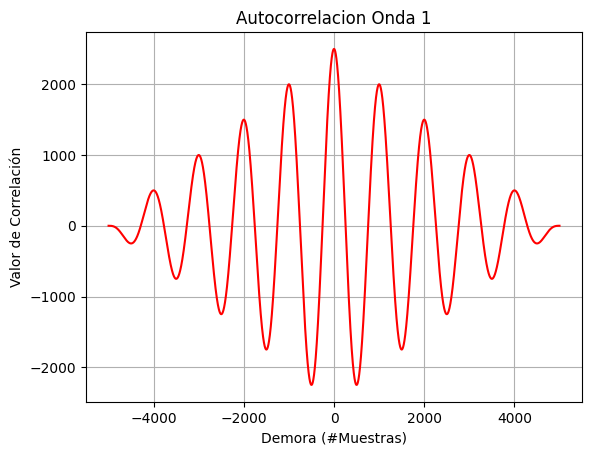

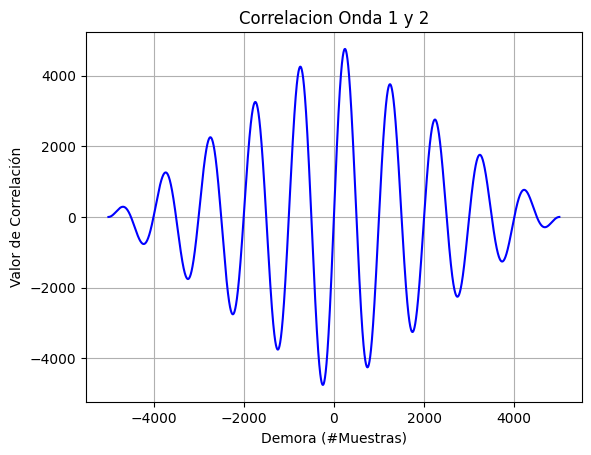

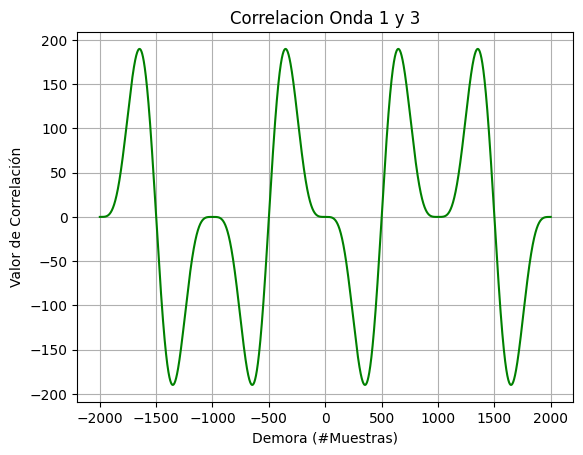

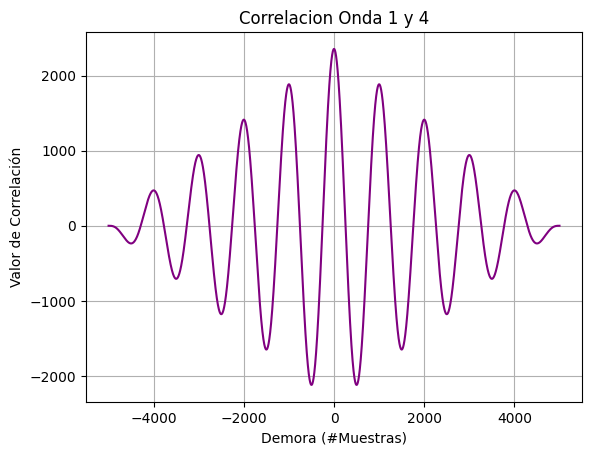

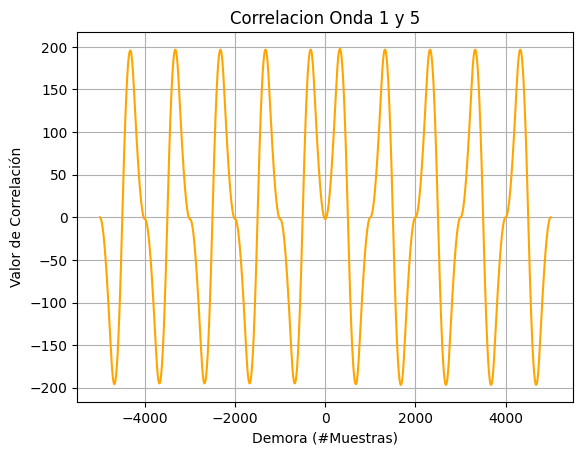

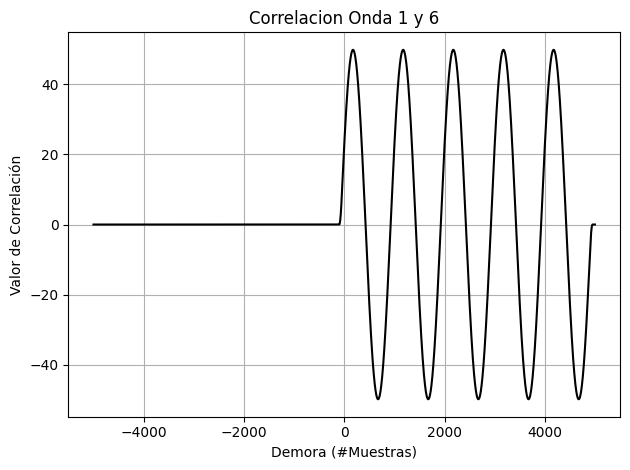

In [40]:
T= np.arange(-4999,5000,1)
Tv= np.arange(-1999,2000.4,0.4)
Rx1x1 = sig.correlate(x1,x1) 
Rx1x2 = sig.correlate(x1,x2) 
Rx1x3 = sig.correlate(x1,x3) 
Rx1x4 = sig.correlate(x1,x4) 
Rx1x5 = sig.correlate(x1,ondaCdr) 
Rx1x6 = sig.correlate(x1,x6) 



plt.figure(1)
plt.plot(T,Rx1x1, color='red')
plt.title('Autocorrelacion Onda 1')
plt.xlabel('Demora (#Muestras)')
plt.ylabel('Valor de Correlación')
plt.grid()

plt.figure(2)

plt.plot(T,Rx1x2, color = 'blue')
plt.title('Correlacion Onda 1 y 2')
plt.xlabel('Demora (#Muestras)')
plt.ylabel('Valor de Correlación')
plt.grid()

plt.figure(3)

plt.plot(Tv,Rx1x3, color='green')
plt.title('Correlacion Onda 1 y 3')
plt.xlabel('Demora (#Muestras)')
plt.ylabel('Valor de Correlación')
plt.grid()

plt.figure(4)

plt.plot(T,Rx1x4, color='purple')
plt.title('Correlacion Onda 1 y 4')
plt.xlabel('Demora (#Muestras)')
plt.ylabel('Valor de Correlación')
plt.grid()

plt.figure(5)

plt.plot(T,Rx1x5, color='orange')
plt.title('Correlacion Onda 1 y 5')
plt.xlabel('Demora (#Muestras)')
plt.ylabel('Valor de Correlación')
plt.grid()

plt.figure(6)

plt.plot(T,Rx1x6, color='black')
plt.title('Correlacion Onda 1 y 6')
plt.xlabel('Demora (#Muestras)')
plt.ylabel('Valor de Correlación')
plt.grid()


plt.tight_layout()

plt.show()



## Consigna 4
    La demostración de la siguiente propiedad se realizó en papel, luego fue transcrita a código LaTeX usando el editor "codecogs" y GeminiAI. Finalmente fue corregida y pulida por mí. Para demostrar la igualdad se utilizó la identidad de Euler, que me permite reescribir ecuaciones trigonométricas como sumas algebráicas de exponenciales. 

$$2.sin(\alpha).sin(\beta) = cos(\alpha -\beta ) - cos(\alpha +\beta)               (1)$$

Recordando de la identidad de Euler:

$$e^{ix} = cos(x) + isen(x)$$

Podemos definir al seno y coseno de $\alpha$ ó $\beta$ (Ambos argumentos de alguna variable compleja) como:

$$sin(\alpha) = \frac{e^{i\alpha} - e^{-i\alpha}}{2i}$$
$$cos(\alpha) = \frac{e^{i\alpha} + e^{-i\alpha}}{2}$$

Luego, el coseno de ($\alpha \pm \beta$) equivale a:

$$cos(\alpha \pm \beta) = \frac{e^{i\alpha \pm \beta} + e^{-i\alpha \pm \beta}}{2}$$

Operando con estas igualdades, llegamos a la siguiente expresion para el producto de la izquierda e la igualdad (1)

$$2.sin(\alpha).sin(\beta) = 2.(\frac{e^{i\alpha} - e^{-i\alpha}}{2i}).(\frac{e^{i\beta} - e^{-i\beta}}{2i})$$
$$2.sin(\alpha).sin(\beta) = \frac{2}{-4}.(e^{i\alpha} - e^{-i\alpha}).(e^{i\beta} - e^{-i\beta})$$
$$2.sin(\alpha).sin(\beta) = \frac{-1}{2}.(e^{i\alpha} - e^{-i\alpha}).(e^{i\beta} - e^{-i\beta})$$

Desarrollando el producto entre las exponenciales:

$$2.sin(\alpha).sin(\beta) = \frac{-1}{2}.(e^{i\alpha + i\beta} - e^{-i\alpha + i\beta} - e^{i\alpha - i\beta} + e^{-i\alpha - i\beta})$$
$$2.sin(\alpha).sin(\beta) = \frac{-1}{2}.(e^{i(\alpha + \beta)} - e^{i(-\alpha + \beta)} - e^{i(\alpha - \beta)} + e^{i(-\alpha - \beta)})  (2)$$

Usando la misma propiedad, la sección derecha de la igualdad (1) se puede reescribir como:

$$cos(\alpha -\beta ) - cos(\alpha +\beta) = \frac{e^{i(\alpha - \beta)} + e^{-i(\alpha - \beta)}}{2} - \frac{e^{i(\alpha + \beta)} + e^{-i(\alpha + \beta)}}{2}$$
$$cos(\alpha -\beta ) - cos(\alpha +\beta) = \frac{e^{i(\alpha - \beta)} + e^{-i(\alpha - \beta)} - {e^{i(\alpha + \beta)} - e^{-i(\alpha + \beta)}}}{2} (3)$$

Igualando ambas equivalencias (2 y 3), se obtiene:

$$2.sin(\alpha).sin(\beta) = cos(\alpha -\beta ) - cos(\alpha +\beta )$$
$$\downarrow$$
$$\frac{-1}{2}.(e^{i(\alpha + \beta)} - e^{i(-\alpha + \beta)} - e^{i(\alpha - \beta)} + e^{i(-\alpha - \beta)}) = \frac{e^{i(\alpha - \beta)} + e^{-i(\alpha - \beta)} - {e^{i(\alpha + \beta)} - e^{-i(\alpha + \beta)}}}{2}$$

$$(-1).(e^{i(\alpha + \beta)} - e^{i(-\alpha + \beta)} - e^{i(\alpha - \beta)} + e^{i(-\alpha - \beta)}) = e^{i(\alpha - \beta)} + e^{-i(\alpha - \beta)} - {e^{i(\alpha + \beta)} - e^{-i(\alpha + \beta)}}$$

$$-e^{i(\alpha + \beta)} + e^{i(-\alpha + \beta)} + e^{i(\alpha - \beta)} - e^{i(-\alpha - \beta)} = e^{i(\alpha - \beta)} + e^{-i(\alpha - \beta)} - {e^{i(\alpha + \beta)} - e^{-i(\alpha + \beta)}}$$

Que son expresiones equivalentes, por lo tanto queda demostrada la igualdad para cualquier valor de $\alpha y \beta$
Para finalizar, aplicaremos la demostración anterior a señales sinusoidales, con $\alpha = \omega.t$ y $2.\beta = \alpha$.

<function matplotlib.pyplot.show(close=None, block=None)>

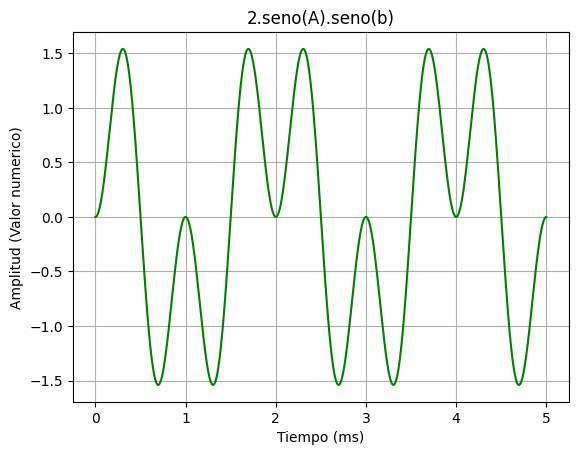

In [4]:
import numpy as np
import matplotlib.pyplot as plt

TT = np.linspace(0,5,10000)
W = 2*np.pi
Alfa = TT*W
Beta = Alfa/2
XX = 2*np.sin(Alfa)*np.sin(Beta)
Xx = np.cos(Alfa-Beta)-np.cos(Alfa+Beta)
plt.plot(TT,XX,'green')
plt.title('2.seno(A).seno(b)')
plt.grid()
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud (Valor numerico)')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

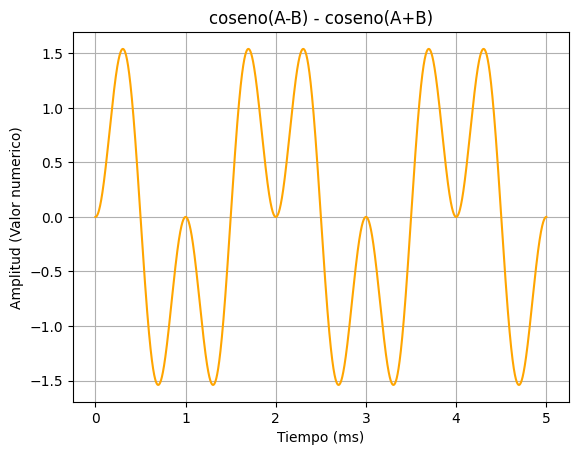

In [17]:
plt.plot(TT,Xx, 'orange')
plt.grid()
plt.title('coseno(A-B) - coseno(A+B)')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud (Valor numerico)')
plt.show

    Con una simple observacion se puede verificar que ambas señales son identicas, comprobando la demostración anterior generalizada a señales senoidales. Para hacer una verificacion mas precisa se podría hacer una operación de correlación cruzada entre ambas señales y ver que el valor promedio del vector obtenido (Ya que la correlacion me devuelve un vector de tamaño 2N-1) es el mismo que al realizar una autocorrelacion con cualquiera de ellas. 

# Conclusiones y autoevaluación

    Encontré en Python una herramienta muy versátil para el ámbito científico en general, entre todas las librerías me encontré por lo menos 4 maneras diferentes de recolectar datos de una señal, también es cómoda la manera de representar dichos datos. Con eso dicho, la curva de aprendizaje es empinada si no se tiene experiencia previa con el lenguaje, y se vuelve aún mas dificil de resolver por cuenta propia si no se tiene formación en informatica. A su vez, recursos modernos como el acceso a internet o la inteligencia artificial demostraron ser extremadamente útiles para traer la información del lenguaje de programación al lenguaje humano. En este trabajo utilicé GeminiAI, la IA de Google, para realizar al menos un punto de cada consigna. En especial aquellos que requirieron usar funciones mas complejas y sobre todo para armar los plots. El problema mas recurrente que me encontré fue malinterpretar (Por mi parte, obviamente) la "Forma" de los datos que me devuelven algunas funciones (Dimensiones, etc), consecuentemente el trabajo tiene algunos puntos donde las muestras se presentan de una determinada manera para evitar este problema. 
    Personalmente encontré este trabajo mas dificil de lo que debería, al menos al principio. Una vez adecuado al entorno de Spyder y Jupiter todo resultó mas sencillo. La parte que menos me costó fue la demostración de la identidad trigonométrica, ya que tengo experiencia usando LaTeX, mientras que la primera consigna fue la que mas tiempo me tomó por mi propia torpeza al usar una computadora. Estimo mejorar en el futuro y que los siguientes trabajos me salgan con mayor fluidez.

. Resolví la tarea, pero tengo dudas 
. Usé GeminiAI para buscar funciones de python que me ayuden a resolver los ejercicios, tratando de usar principalmente las mencionadas en clase o algunas que haya usado en el pasado. No la utilicé para buscar conceptos teóricos (Uso el PDF del Holton y mis propios apuntes para eso), ni para escribir una sola palabra de este trabajo.

